# __Supervised Learning: Classification__

## __Agenda__

- Handling Imbalanced Data in Classification
  - Introduction to Imbalanced Data
  - Oversampling Techniques (e.g., SMOTE)
  - Undersampling Techniques
  - Ensemble Methods for Imbalanced Data

## __4.6 Handling Imbalanced Data in Classification__

In machine learning classification tasks, handling imbalanced data is crucial.  The problem with this imbalance is that models tend to favor the majority class, leading to poor performance in identifying minority classes. In such cases, the model prioritizes overall accuracy instead of accurately recognizing minority class instances.

### __4.6.1 Introduction to Imbalanced Data__

Imbalanced data refers to a situation in a dataset where the classes are not represented equally. This typically happens in classification problems, where one class (the majority class) significantly outnumbers the other class or classes (the minority class or classes).

#### __Imbalanced Data: Example__



**Balanced Dataset:** A balanced dataset has an equal or nearly equal representation of all classes.

Distribution: Healthy (50.4%) and Diseased (49.6%)

**Imbalanced Dataset:** An imbalanced dataset has a significant difference in the representation of classes, with one class being much more prevalent than the others.

Distribution: Healthy (99%) and Diseased (1%)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Imbalanced_data.jpg)

#### __Applications of Handling Imbalanced Data__



**Medical Diagnosis:**
- Detecting rare diseases where early and accurate detection is vital.
Imbalanced data can lead to models that fail to identify patients with the disease.

**Fraud Detection:**
- Identifying fraudulent transactions among a large number of legitimate transactions.
The cost of missing fraud can be high, making accurate detection crucial.

**Spam Detection:**
- Filtering spam emails from a large volume of legitimate emails.
A balanced approach ensures spam emails are correctly identified and filtered.

**Before diving into techniques to handle imbalanced data, it’s important to first understand how to determine if your data is balanced or imbalanced.**

#### Imbalanced data Guidelines (example for binary classification)

- Mild imbalance: 60:40 to 75:25 (may not require special handling)
- Moderate imbalance: 80:20 to 90:10 (consider addressing imbalance)
- Severe imbalance: 95:5 to 99:1 to worse (definitely address imbalance)

**Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Load the Dataset**

**About the Dataset:**

The datasets contains transactions made by credit cards in September 2013 by European cardholders.

 It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, original features and more background information about the data is not available.

 Features `V1, V2, ... V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.

 Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.

 The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

 Feature `Class` is the response/target variable and it takes value 1 in case of fraud and 0 otherwise.

 **Note:** PCA is a Dimensionality reduction technique and we will be discussing about it in detail, in the next lesson.

In [2]:
!pip install -U imbalanced-learn

In [3]:
file_path = 'creditcard.csv'  # Update this with the actual path to your file
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


**Check the Distribution of the `Class` Column**

In [4]:
# Total length of the dataframe:
len(df)

2000

In [5]:
df.shape

(2000, 31)

In [8]:
class_distribution = df['Class'].value_counts()
print(class_distribution)

Class
0    1974
1      26
Name: count, dtype: int64


**Plot the Distribution of the `Class` Column**

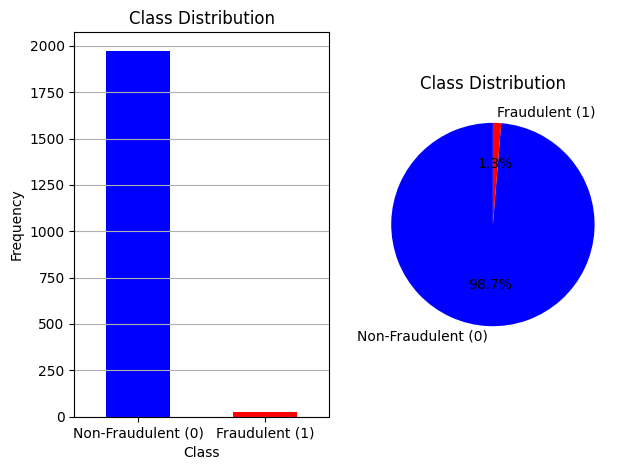

In [9]:
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.grid(axis='y')

# Plot the distribution of the 'Class' column as a pie chart
plt.subplot(1, 2, 2)
class_distribution.plot(kind='pie', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
imbalance_ratio = class_distribution[0] / class_distribution[1]
print(f"Imbalanced Ratio: {imbalance_ratio:.2f}")

Imbalanced Ratio: 75.92


**Observation**

- The dataset is highly imbalanced, with nearly 2000 non-fraudulent transactions and only around 25 fraudulent ones.
- This significant imbalance needs to be addressed to avoid biased models and ensure fair and accurate predictions.

**Using this dataset for classification has the following disadvantages:**

- **Bias Towards Non-Fraudulent Transactions:** The model may predict non-fraudulent transactions more often due to their dominance, leading to poor detection of fraudulent transactions.
- **Misleading Metrics:** High accuracy can be misleading since it may not reflect the model's performance on the minority class (fraudulent transactions). Techniques like resampling or cost-sensitive learning are needed to address this imbalance.

Now, let's explore some of the most commonly used techniques to balance imbalanced data and subsequently fit it into a classification model to calculate the model's accuracy.

#### __Techniques to Handle Imbalanced Data__

There are numerous techniques available for addressing imbalanced data. In this discussion, we will focus on understanding three key methods:



**Oversampling Techniques (e.g., SMOTE):**

- Condition for Use: Ideal when the minority class is severely underrepresented.

**Undersampling Techniques (Random Undersampling):**

- Condition for Use: Useful when the dataset is large enough, and removing instances won't result in significant information loss.

**Ensemble Methods for Imbalanced Data (Balanced Random Forest):**

- Condition for Use: Effective when leveraging an ensemble approach to maintain robustness and generalizability while addressing class imbalance.

Let's delve into each of these techniques in detail, including their implementation.

### __4.6.2 Oversampling Techniques__

Oversampling is a technique used to balance the class distribution by increasing the number of minority class samples. This can be done by duplicating existing samples or creating synthetic ones.



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/oversampling.png)

**SMOTE (Synthetic Minority Over-sampling Technique)** is a more advanced method that generates new synthetic samples for the minority class. It works by:

- Selecting a random minority class sample.
- Finding its k-nearest neighbors (usually k=5).
- Choosing one of these neighbors and creating a synthetic sample along the line segment joining the original sample and the neighbor.


**Advantages of SMOTE:**

- **Prevents overfitting:** Unlike simple duplication, SMOTE generates new samples, which helps in creating a more generalizable model.

- **Balances the dataset:** By creating new samples, SMOTE helps balance the class distribution, improving the model's ability to learn from minority class examples.

**Let's implement SMOTE on the same `creditcard` dataset.**

**Import Libraries:**
- Import the required libraries for data manipulation, model building, and evaluation.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt

**Load the Dataset:**
- Load the dataset into a pandas DataFrame.
- Split the data into features `X` and target variable `y`.

In [24]:
# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

**Split the Data and Standardize the Features:**
- Split the data into training and testing sets using an 60-40 split.
- Standardize the feature variables to have mean 0 and variance 1.

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Standardize the feature variables
rob_scaler = RobustScaler()
X_train_rs = scaler.fit_transform(X_train)
X_test_rs = scaler.transform(X_test)

Plot the Imbalanced Data:
- Let's first plot the imbalanced data in a scatter plot to compare it with balanced data.

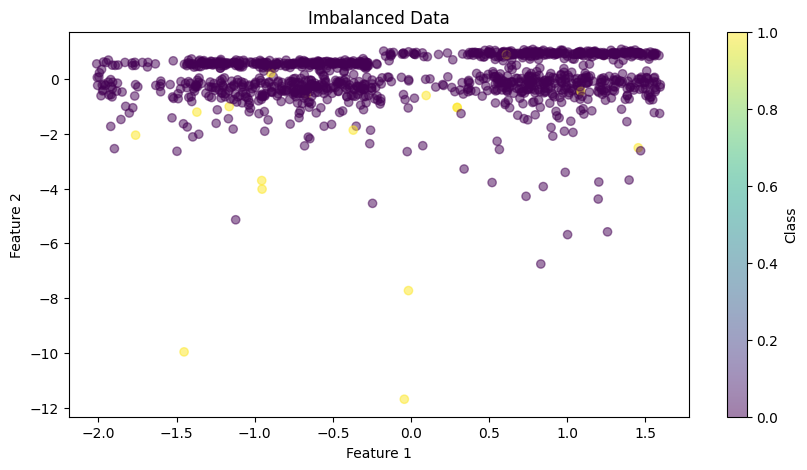

In [26]:
# Scatter plot for the imbalanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

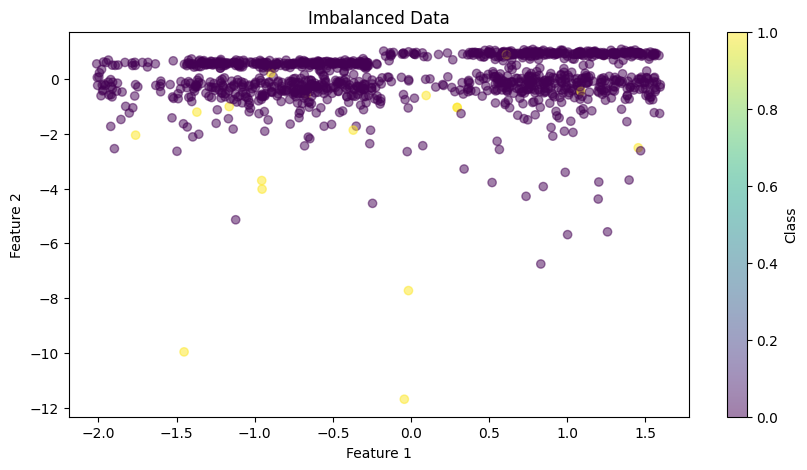

In [41]:
# Scatter plot for the imbalanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_rs[:, 0], X_train_rs[:, 1], c=y_train, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

#### __Observation__

- The color of each data point indicates the class it belongs to. The color scale on the right shows a gradient from purple (0.0) to yellow (1.0), where each color represents a class label.

- There are predominantly purple points, indicating a majority of data points belong to the class close to 0.0. Yellow points, indicating data points with a class close to 1.0, are much fewer in comparison.

Given the class imbalance, using models that can handle imbalance well or adjusting the decision threshold might be beneficial.

**Apply Random Undersampling:**
- Balance the dataset by applying the SMOTE.

In [27]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [42]:
X_train_smote_rs, y_train_smote_rs = smote.fit_resample(X_train_rs, y_train)

In [51]:
# Apply ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=7)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_sc, y_train)

Plot the Balanced Data:
- Plot the balanced data in a scatter plot to compare it with imbalanced data.

Text(0, 0.5, 'Feature 2')

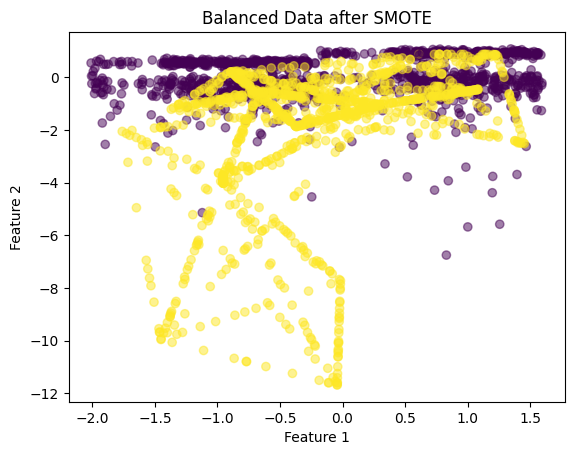

In [45]:
plt.scatter(X_train_smote_rs[:, 0], X_train_smote_rs[:, 1], c=y_train_smote_rs, alpha=0.5, cmap="viridis", marker='o')
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

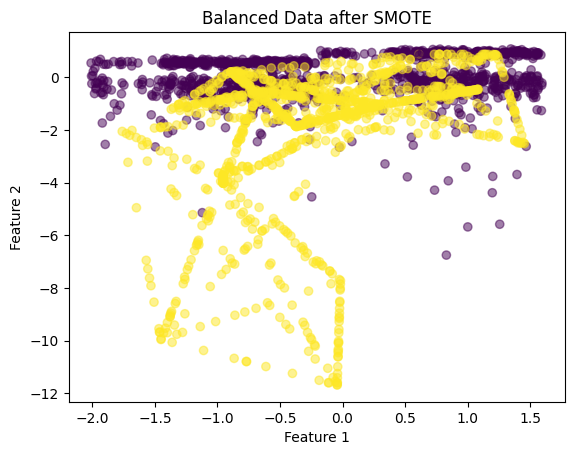

In [29]:
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote, alpha=0.5, cmap="viridis", marker='o')
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Feature 2')

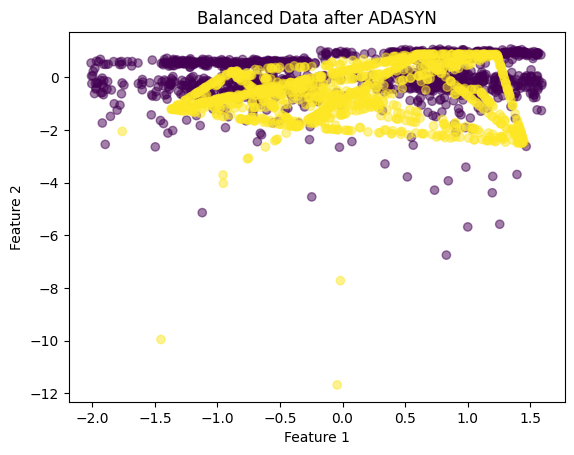

In [52]:
plt.scatter(X_train_adasyn[:, 0], X_train_adasyn[:, 1], c=y_train_adasyn, alpha=0.5, cmap="viridis", marker='o')
plt.title('Balanced Data after ADASYN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

**Observation:**

As we can clearly see, the data is more balanced after applying SMOTE (Synthetic Minority Over-sampling Technique).

**Train and Evaluate the Decision Tree Classifier:**
- Initialize and train a Decision Tree classifier on the undersampled training data.
- Predict on the training and testing set and calculate the accuracy.

In [31]:
# Train the Decision Tree Classifier with pruning
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier.fit(X_train_smote, y_train_smote)

# Predict on training set
y_train_pred = dt_classifier.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [32]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9945008460236887
Test Accuracy: 0.985


In [46]:
# Train the Decision Tree Classifier with pruning
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier.fit(X_train_smote_rs, y_train_smote_rs)

# Predict on training set
y_train_pred = dt_classifier.predict(X_train_smote_rs)
train_accuracy = accuracy_score(y_train_smote_rs, y_train_pred)

# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_rs)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9945008460236887
Test Accuracy: 0.985


In [53]:
# Train the Decision Tree Classifier with pruning
dt_classifier_adasyn = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict on training set
y_train_pred_adasyn = dt_classifier_adasyn.predict(X_train_adasyn)
train_accuracy_adasyn = accuracy_score(y_train_adasyn, y_train_pred_adasyn)

# Predict on testing set
y_test_pred_adasyn = dt_classifier_adasyn.predict(X_test_sc)
test_accuracy_adasyn = accuracy_score(y_test, y_test_pred_adasyn)
print(f'Train Accuracy: {train_accuracy_adasyn}')
print(f'Test Accuracy: {test_accuracy_adasyn}')

Train Accuracy: 0.9898520084566597
Test Accuracy: 0.96


**Observation:**

The Decision Tree classifier, when trained on the SMOTE-balanced dataset, achieved high accuracy on both the training (99.4%) and testing (98%) sets, indicating strong model performance. However, the slight drop in test accuracy compared to train accuracy suggests some overfitting. The model generalizes well but may still benefit from further tuning or validation techniques.

Confusion Matrix:
[[780  12]
 [  0   8]]


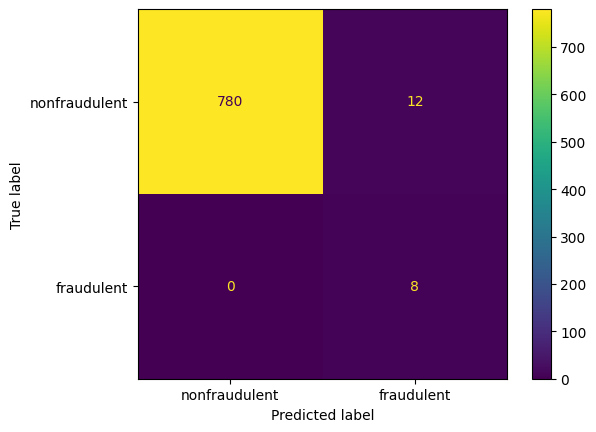

In [33]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["nonfraudulent", "fraudulent"])

# display matrix
cm_display.plot()
plt.show()


Confusion Matrix:
[[768  24]
 [  3   5]]


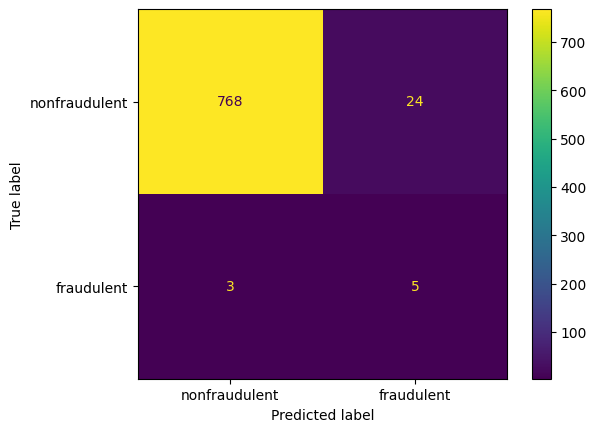

In [38]:
# Print confusion matrix adasyn
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_test_pred_adasyn)
print("Confusion Matrix:")
print(conf_matrix)


# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["nonfraudulent", "fraudulent"])

# display matrix
cm_display.plot()
plt.show()

In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.40      1.00      0.57         8

    accuracy                           0.98       800
   macro avg       0.70      0.99      0.78       800
weighted avg       0.99      0.98      0.99       800


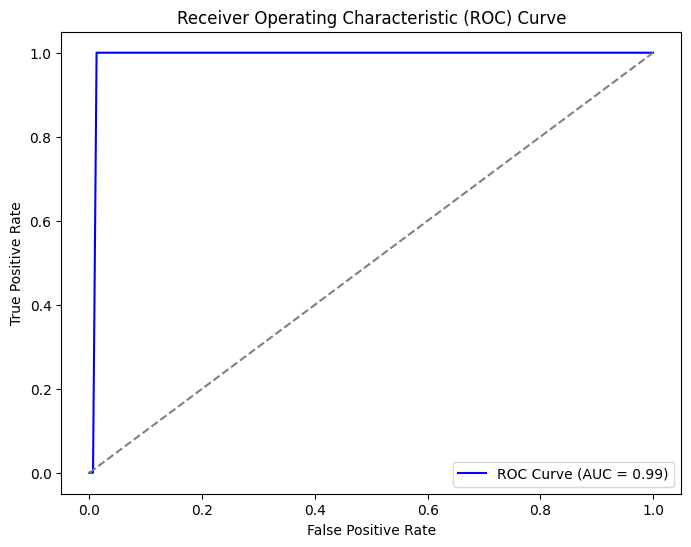

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC score
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test_sc)[:, 1])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test_sc)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Let's explore some more techniques to balance this data.

### __4.6.3 Undersampling Techniques__

Undersampling is the opposite of oversampling. It involves reducing the number of samples in the majority class to balance the dataset. This can be done by randomly removing samples or using more sophisticated techniques.



![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/undersampling.png)

**Random Undersampling**

It is the simplest form of undersampling, where majority class samples are randomly removed to achieve balance.



**How Random Undersampling Works**

1. **Identify Majority and Minority Classes:** First, identify which class is overrepresented (majority class) and which is underrepresented (minority class) in the dataset.

2. **Randomly Remove Samples:** Randomly select and remove samples from the majority class until the number of samples in each class is balanced. For example, if you have 1,000 samples in the majority class and 100 in the minority class, you might randomly remove 900 samples from the majority class.

3. **Resulting Dataset:** The resulting dataset will have a more balanced distribution of classes, with a reduced number of samples from the majority class.

**Advantages of Random Undersampling:**

- **Simple and easy to implement:** This technique is straightforward and can be applied quickly.
- **Reduces training time:** By reducing the number of samples, it can speed up the training process.

**Disadvantages of Random Undersampling:**

- **Loss of information:** Removing samples from the majority class can lead to loss of important information.
- **Overfitting:** The model might overfit to the remaining data, especially if the dataset is small.

Let's implement Random Undersampling

We will use the same dataset and train-test split for applying these data balancing techniques and fitting the classification model to evaluate its accuracy.

**Import Libraries:**
- Import `RandomUnderSampler` from `imblearn.under_sampling`

In [17]:
from imblearn.under_sampling import RandomUnderSampler

**Apply Random Undersampling:**
- Balance the dataset by randomly undersampling the majority class.

**Note:** Here, we are directly starting from applying the algorithm since we are using the same dataset and train-test split from above.

In [18]:
# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_sc, y_train)

Plot the Balanced Data:
- Plot the balanced data in a scatter plot to compare it with imbalanced data plotted in previous technique.

Text(0, 0.5, 'Feature 2')

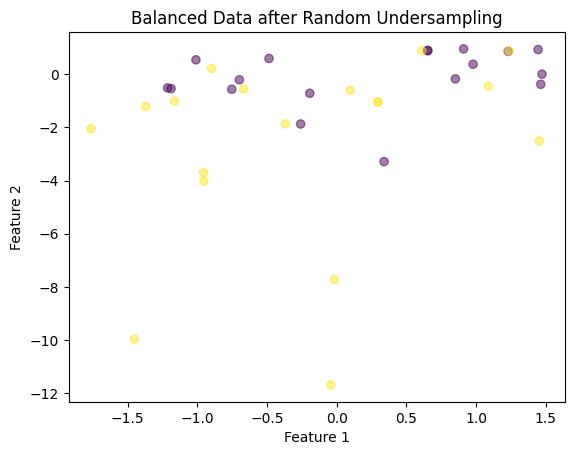

In [19]:
plt.scatter(X_train_undersampled[:, 0], X_train_undersampled[:, 1], c=y_train_undersampled, cmap="viridis", alpha=0.5, marker='o')
plt.title('Balanced Data after Random Undersampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

**Observation:**

As we can see, the data is more balanced after applying Random Undersampling, but the data points are less.

**Train and Evaluate the Decision Tree Classifier:**
- Initialize and train a Decision Tree classifier on the undersampled training data.
- Predict on the training and testing set and calculate the accuracy.

In [20]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_undersampled, y_train_undersampled)

# Predict on training set
y_train_pred = dt_classifier.predict(X_train_undersampled)
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)

# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [21]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Train Accuracy: 1.0
Test Accuracy: 0.8075


#### __Observation__

- A training accuracy of 1.0 indicates that the model has perfectly learned or memorized the training dataset. It can correctly predict the outcome for every example it was trained on.
- This could be a sign of overfitting, where the model is too closely fitted to the training data. It learns not only the underlying patterns but also the noise and fluctuations specific to the training set.

Use techniques like **k-fold cross-validation** to assess model performance more reliably. This helps ensure that the model's performance is robust across different subsets of the training data.

The `imblearn.pipeline.Pipeline` is specifically designed to handle imbalanced datasets by integrating resampling methods directly into the pipeline steps

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Create a pipeline for proper cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scales each feature to zero mean and unit variance
    ('sampler', RandomUnderSampler(random_state=42)),  # Balances the dataset by undersampling
    ('classifier', DecisionTreeClassifier(random_state=42))  # Applies a Decision Tree Classifier
])
# Perform cross-validation using the entire dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')

# Evaluate the model using precision, recall, and F1 score
print(classification_report(y_test, y_test_pred))

Cross-validation Accuracy: 0.876
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       792
           1       0.05      1.00      0.09         8

    accuracy                           0.81       800
   macro avg       0.52      0.90      0.49       800
weighted avg       0.99      0.81      0.88       800


 **Note:**

 In situations where the dataset is highly imbalanced, the ROC curve can give an overly optimistic assessment of the model’s performance.

This optimism bias arises because the ROC curve’s false positive rate (FPR) can become very small when the number of actual negatives is large. As a result, even a large number of false positives would only lead to a small FPR, leading to a potentially high AUC that doesn’t reflect the practical reality of using the model.

Then comes **Precision-Recall Curve and AUCPR** which is especially useful when the positive class is rarer and more relevant.

#### __Plotting a Precision Recall curve:__

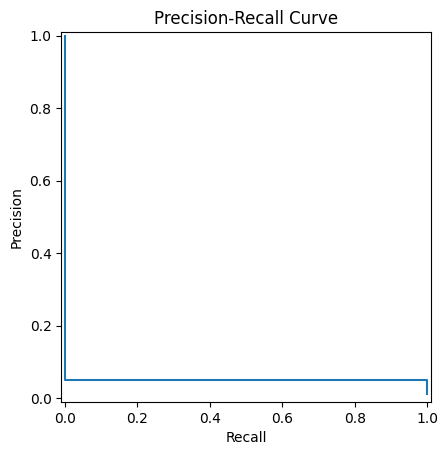

Area under the Precision-Recall Curve(AUCPR): 0.04938271604938271


In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# Predict probabilities for the positive class
y_scores = dt_classifier.predict_proba(X_test_sc)[:, 1]

# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Use PrecisionRecallDisplay to plot the curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# Compute the average precision score (AUCPR)
aucpr = average_precision_score(y_test, y_scores)
print(f'Area under the Precision-Recall Curve(AUCPR): {aucpr}')

#### __Observation__

- The curve starts with a high precision value of 1.0 when recall is near zero. This indicates that at the very low threshold settings, where the model predicts only the most confidently positive samples as positive, it does so correctly.

- As recall increases slightly, the precision drops sharply to a low value (close to 0.2) and remains nearly constant across the rest of the recall range. This is a characteristic of a model that, after a certain point, begins to classify more and more negative samples as positive, thus drastically reducing precision.

The nearly flat and low precision across most of the recall range suggests that the model struggles to discriminate between positive and negative classes effectively as it attempts to increase recall

### __4.6.4 Ensemble Methods for Imbalanced Data__

Ensemble methods combine multiple models to improve performance. For imbalanced data, one effective approach is to use an ensemble method that specifically addresses class imbalance.

**Balanced Random Forest (BRF)**

It is an ensemble learning method designed to handle class imbalance in classification tasks. It modifies the standard Random Forest algorithm to address the imbalance issue by combining random undersampling of the majority class with the power of ensemble learning.



**How Balanced Random Forest Works**

1. **Sampling:** In each iteration, instead of using the entire majority class, BRF randomly samples (with replacement) a subset of the majority class that is equal in size to the minority class. This creates a balanced subset of the data for training each tree.

2. **Tree Construction:** A decision tree is trained on this balanced subset. Each tree in the forest is built using a different balanced subset of the data.

3. **Ensemble Learning:** The final model is an ensemble of these trees. Predictions are made by averaging the predictions of all trees (in the case of regression) or by majority vote (in the case of classification).



**Benefits of Balanced Random Forest**
- **Improved Performance on Minority Class:** By balancing the dataset for each tree, BRF improves the model’s ability to correctly classify instances of the minority class.
- **Reduced Bias:** It helps in reducing the bias towards the majority class, a common issue in imbalanced datasets.
- **Robustness:** The ensemble approach enhances the robustness of the model by combining multiple trees, each trained on a different balanced subset of the data.

Let's implement Balanced Random Forest

We will use the same dataset and train-test split for applying these data balancing techniques and fitting the classification model to evaluate its accuracy.

**Import Libraries:**
- Import `BalancedRandomForestClassifier` from `imblearn.under_sampling`

The `BalancedRandomForestClassifier` is a specialized version of the traditional Random Forest classifier designed to handle imbalanced datasets. In imbalanced datasets, the number of instances in each class is not equally distributed, which can lead to biased models that favor the majority class.

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

**Apply Balanced Random Forest:**
- Balance the dataset by Balanced Random Forest.

**Note:** Here, we are directly starting from applying the algorithm since we are using the same dataset and train-test split.

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Train the Balanced Random Forest Classifier with explicit parameters
brf_classifier = BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto', replacement=False, bootstrap=True)
brf_classifier.fit(X_train_sc, y_train)

BalancedRandomForestClassifier(bootstrap=True, random_state=42,
                               replacement=False, sampling_strategy='auto')

**Predict and Evaluate the Model**

- Predict on the training and testing set and calculate the accuracy.

In [55]:
# Predict on training set
y_train_pred = brf_classifier.predict(X_train_sc)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing set
y_test_pred = brf_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

**Evaluate the Model Using Precision, Recall, and F1 Score**
- `cross_val_score` performs cross-validation, which is a technique to assess the generalizability of the model.

In [56]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Train Accuracy: 0.9883333333333333
Test Accuracy: 0.98125


In [57]:
brf_classifier.feature_importances_

array([0.00472008, 0.05503434, 0.04436396, 0.02290857, 0.14267122,
       0.01784897, 0.01484768, 0.08624593, 0.00298739, 0.02383945,
       0.03893602, 0.04943515, 0.07877584, 0.        , 0.0965452 ,
       0.01181973, 0.12205172, 0.03267145, 0.02349534, 0.00712523,
       0.00333333, 0.05646324, 0.00592456, 0.00254622, 0.00461294,
       0.010081  , 0.00583747, 0.00200947, 0.02857556, 0.00429293])

In [ ]:
# Define the pipeline with explicit parameters to avoid FutureWarnings
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BalancedRandomForestClassifier(random_state=42, sampling_strategy='auto', replacement=False, bootstrap=True))
])

# Perform cross-validation using the entire dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')

# Fit the pipeline and evaluate the model using precision, recall, and F1 score
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_test_pred))

Cross-validation Accuracy: 0.9865
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.35      1.00      0.52         8

    accuracy                           0.98       800
   macro avg       0.67      0.99      0.75       800
weighted avg       0.99      0.98      0.99       800


**Conclusion:**

In this lesson, we explored various strategies for handling imbalanced data in classification tasks. We introduced the concept of imbalanced data and demonstrated oversampling techniques like SMOTE and undersampling techniques such as Random Undersampling. Additionally, we covered ensemble methods like the Balanced Random Forest, which effectively balance class distribution during training. These techniques collectively enhance model performance and ensure more accurate predictions for minority classes.